## Pendulum
With and without small angle approximation

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma

from sympy import *
import matplotlib.pyplot as plt
init_session()
init_printing(use_unicode=True)

from IPython.display import display, Math, Latex

from collections.abc import Iterable

import seaborn as sns
sns.set()
sns.set_style("whitegrid", {'grid.linestyle': '--'})

from scipy import integrate as integ

# remove/comment line below to get plots in a seperate window
%matplotlib inline


IPython console for SymPy 1.6.1 (Python 3.8.3-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.6.1/



In [2]:
def AnalyticSolution(x0, v0, omega=1, friction=0):
    t=symbols('t', real=True)
    f = Function("\\theta")(t) # f is a function of t
    # f_ will be the derivative of f with respect to t

    f_ = Derivative(f, t)
    f__ = Derivative(f_,t)
    eq=f__ + friction*f_ + omega**2 * f
    strng="analytically solve \\(" + latex(eq) + " = 0\\)"
    display(Latex(strng))
    linsol=dsolve(eq,ics={f.subs(t,0):x0, f_.subs(t,0):v0})
    display(linsol)
    return lambdify(t, linsol.rhs)

def FirstOrderCorrection(t, A, omega): # this is probably wrong
    C = (1-2/(9*omega))/omega
    co=np.cos(omega*t)
    return (A**3/(6*omega))*(-co + (co - co**3/3)/3  +C)

def systemOfODE(y, t, omega=1, friction=0):
    theta, dtheta = y
    dydt = [dtheta, -friction*dtheta - omega**3 * np.sin(theta)]
    return dydt

def NumericSolution(times, x0=0.1, v0=0, omega=1, friction=0):
    y0 = [x0, v0]
    strng="numrically solved \\(\\frac{d^2 \\theta}{d t^2} + " + str(friction) + " \\frac{d \\theta}{d t} + "  + str(omega) + "\\sin(\\theta(t)) = 0\\)"
    display(Latex(strng))
    numsol = integ.odeint(systemOfODE, y0, times, (omega, friction))
    return numsol

def CompareSolutionsPendulum(x0=0.1, v0=0, omega=1, friction=0, timerange=(0, 8*np.pi)):
    plt.figure(figsize=(15,8))
    times=np.linspace(timerange[0], timerange[1],1000)

    anasol=AnalyticSolution(x0, v0, omega, friction)
    numsol=NumericSolution(times, x0, v0, omega, friction)

    an=anasol(times)
    ancorr = an + FirstOrderCorrection(times, x0, omega)
    plt.plot(times, an,label = "analytic, small angle approximation")
    #plt.plot(times, ancorr,label = "analytic, with 2nd order correction")
    plt.plot(times, numsol[:,0], label = "numeric, full")
    plt.legend()
    plt.xlabel('time t')
    plt.ylabel('$\\theta(t)$')
    plt.show()


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

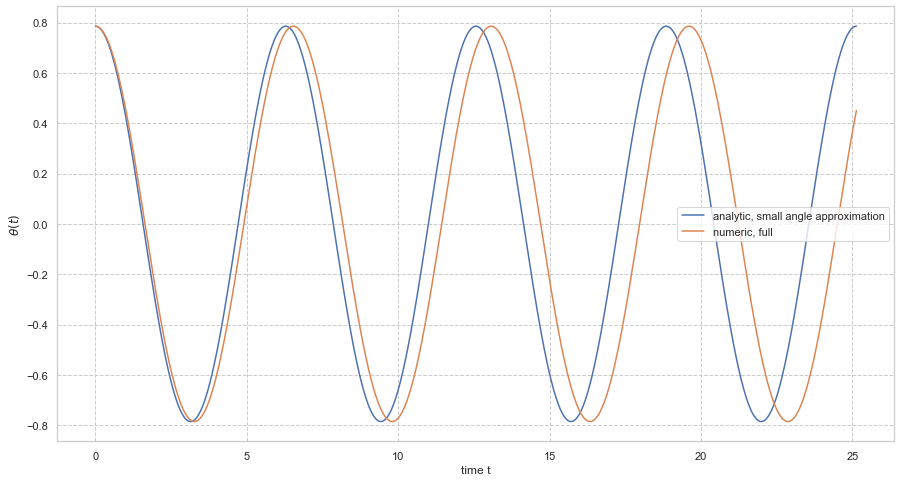

In [3]:
CompareSolutionsPendulum(x0=np.pi/4, omega=1, friction=0.)